In [81]:
%run std_libraries.py
#from Bio.Align import MultipleSeqAlignment
import json

%load_ext autoreload
%autoreload 2
# %matplotlib 
# plt.ioff()
%matplotlib inline
#matplotlib notebook

y1000_plus_dir_ubuntu = '/home/heineike/GitHub/y1000plus_tools/data/'
metproj_data_dir = os.path.normpath('C:/Users/heineib/Google Drive/Crick_LMS/projects/jason_met_auxotrophy') + os.sep

aln_fname_base_win = y1000plus_dir + os.path.normpath('y1000plus_tools_data/y1000plus/proteins_og') + os.sep


y1000_species = pd.read_csv(y1000plus_dir + os.path.normpath('y1000plus_tools_data/y1000plus/y1000_species_table.csv'), index_col=0)

#Select only clades of interest: 
#clades_of_interest = {'Saccharomycetaceae','Saccharomycodaceae','Phaffomycetaceae','CUG-Ser2','CUG-Ser1','Pichiaceae','CUG-Ala'}
#clades_of_interest = {'Saccharomycetaceae', 'Saccharomycodaceae'}
#outgroups = [ 'Wickerhamomyces anomalus','Cyberlindnera jadinii', 'Ascoidea rubescens','Komagataella pastoris','Debaryomyces hansenii', 'Candida albicans', 'Yarrowia lipolytica']
#outgroup = 'Yarrowia lipolytica'

#y1000_species_subset = y1000_species[(y1000_species['Major clade'].isin(clades_of_interest))  |  (y1000_species['Species name'].isin(outgroups))]


#outgroup = 'Hanseniaspora vineae'  #For EGO2/4 - only Sacch so use different outgroup
#y1000_species_subset = pd.concat([y1000_species_subset, y1000_species[y1000_species['Species name']==outgroup]])

y1000_species_subset = y1000_species[y1000_species['Major clade']!='outgroup']
#y1000_species_subset = y1000_species\n


y1000plus_tools dir is unset
y1000plus data dir is unset
New users will need to update the y1000plus_tools, y1000plus_dir, figsave_dir, and yeast_esr_exp_dir (if those libraries are being used)
y1000plus_tools dir is C:\Users\heineib\Documents\GitHub\y1000plus_tools\
y1000plus data dir is C:\Users\heineib\Documents\GitHub\y1000plus_tools\data\


Use yeast_esr_expression functions? (Y/n) Y


Importing y1000plus_tools.py
importing yeast_esr_exp
['C:\\Users\\heineib\\Documents\\GitHub\\y1000plus_tools\\scripts', 'C:\\Users\\heineib\\Anaconda3\\envs\\sc_seq_py\\python37.zip', 'C:\\Users\\heineib\\Anaconda3\\envs\\sc_seq_py\\DLLs', 'C:\\Users\\heineib\\Anaconda3\\envs\\sc_seq_py\\lib', 'C:\\Users\\heineib\\Anaconda3\\envs\\sc_seq_py', '', 'C:\\Users\\heineib\\Anaconda3\\envs\\sc_seq_py\\lib\\site-packages', 'C:\\Users\\heineib\\Anaconda3\\envs\\sc_seq_py\\lib\\site-packages\\ete3-3.1.2-py3.7.egg', 'C:\\Users\\heineib\\Anaconda3\\envs\\sc_seq_py\\lib\\site-packages\\win32', 'C:\\Users\\heineib\\Anaconda3\\envs\\sc_seq_py\\lib\\site-packages\\win32\\lib', 'C:\\Users\\heineib\\Anaconda3\\envs\\sc_seq_py\\lib\\site-packages\\Pythonwin', 'C:\\Users\\heineib\\Anaconda3\\envs\\sc_seq_py\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\heineib\\.ipython', 'C:\\Users\\heineib\\Documents\\GitHub\\y1000plus_tools\\', 'C:\\Users\\heineib\\Documents\\GitHub\\yeast_esr_expression_anal

In [ ]:

#For now just looking in the vicinity of YLL058W.  In the future would like to look in the vicinity of all of them. 

#From paper Jason Cited: 
#['AYT1', 'MHT1', 'MMP1', 'GTT2', 'YLL059C', 'YLL058W', 'YLL057C', 'YLL056C', 'YLL055W', 'YLL054C', 'YLL053C', 'AQY2', 'FRE6']


In [129]:
#Load S.Cer lookup table: 
scer_lookup_fname = y1000plus_dir + os.path.normpath('y1000plus_tools_data/y1000plus/id_lookups/saccharomyces_cerevisiae.csv')

scer_lookup = pd.read_csv(scer_lookup_fname, index_col=0)
scer_y1000_id_gene_id_lookup = dict(zip(scer_lookup['y1000_id'], scer_lookup.index))

#Met17: 'YLR303W', 
#Str2:  YJR130C
#'YML082W', 
#Str3: 'YGL184C', 
#'YLL058W', 
#Cys3: 'YAL012W'
#IRC7: 'YFR055W'

# sul_operon = ['YLL051C',
# 'YLL052C',
# 'YLL053C',
# 'YLL054C',
# 'YLL055W',
# 'YLL056C',
# 'YLL057C',
# 'YLL058W',
# 'YLL059C',
# 'YLL060C',
# 'YLL061W',
# 'YLL062C',
# 'YLL063C']

# print('The following genes are missing from y1000plus index')
# print(set(sul_operon)-set(scer_lookup.index))

# target_y1000_ids = scer_lookup.loc[list(set(sul_operon) & set(scer_lookup.index)), 'y1000_id']

# y1000_id_list = list(target_y1000_ids)
# goi_og_lookup, og_genes_lookup = y1000plus_tools.make_og_genes_lookup(y1000_id_list, y1000_species_subset)

# gene_id_gene_full_lookup = dict(zip(spec_lookup.index, spec_lookup['gene_full']))
# gene_full_y1000_id_lookup = dict(zip(spec_lookup['gene_full'],spec_lookup['y1000_id']))    
# gene_full_gene_id_lookup = dict(zip(spec_lookup['gene_full'],spec_lookup.index)) 

In [79]:
gene_id

'YLL058W'

In [110]:
bp_range = 15000
sc_gene_name = 'saccharomyces_cerevisiae_YLL058W'
spec = '_'.join(sc_gene_name.split('_')[0:-1])
gene_id = '_'.join(sc_gene_name.split('_')[-1:])


#If necessary, make the gtf databases: 

db_fname =  y1000plus_dir +  os.path.normpath("y1000plus_tools_data/scer_20181114/saccharomyces_cerevisiae_R64-2-2_20170117.db") 

if not(os.path.isfile(db_fname)):
    y1000plus_tools.make_gtf_dbs([spec])
    # db = gffutils.create_db(fn, dbfn=dbfn, force=True, keep_order=True, merge_strategy='merge', sort_attribute_values=True)
else: 
    print(db_fname + ' already exists')

#Load the genome 

#Make full_gene lookup for focus spec
#spec_lookup_fname = y1000plus_dir + os.path.normpath('y1000plus_tools_data/y1000plus/id_lookups/' + spec + '.csv')
#spec_lookup = pd.read_csv(spec_lookup_fname, index_col=0)

#y1000_id_gene_full_lookup = dict(zip(spec_lookup['y1000_id'],spec_lookup['gene_full']))        
#y1000_id_gene_id_lookup = dict(zip(spec_lookup['y1000_id'],spec_lookup.index))    
#gene_id_gene_full_lookup = dict(zip(spec_lookup.index, spec_lookup['gene_full']))
#gene_full_y1000_id_lookup = dict(zip(spec_lookup['gene_full'],spec_lookup['y1000_id']))    
#gene_full_gene_id_lookup = dict(zip(spec_lookup['gene_full'],spec_lookup.index))    


# Load GTF for given sequence: 
#gtf_dir = y1000plus_dir + os.path.normpath("shen_2018_data/0_332yeast_genomes/332_genome_annotations/gtf") + os.sep
#db_fname =  y1000plus_dir + os.path.normpath("y1000plus_tools_data/y1000plus/gffutils_dbs/" + spec + '.db')

gtf_db = gffutils.FeatureDB(db_fname)

# Make a dictionary of scaffold sizes
genome_assembly_fname = y1000plus_dir +  os.path.normpath("y1000plus_tools_data/scer_20181114/saccharomyces_cerevisiae_R64-2-2_20170117.fasta")
scaffold_sizes = {}
for seq in SeqIO.parse(genome_assembly_fname, "fasta"):
    scaffold_sizes[seq.id] = len(seq.seq)

#Find surrounding genes (what range)

#focus_gene_id = y1000_id_gene_id_lookup[og_gene]

# gene_full = gene_id_gene_full_lookup[gene_id]

cursor = gtf_db.execute('select * from features where attributes like "%' + gene_id + '%"')
all_features = cursor.fetchall()
if len(all_features) == 0:
    print('No features found ' + gene_full + ' ' + focus_spec)  

CDS_list = [feature for feature in all_features if feature['featuretype']=='CDS']
if len(CDS_list)==1: 
    start = CDS_list[0]['start']
    end = CDS_list[0]['end']
elif len(CDS_list)>1: 
    print('More than one CDS - introns?.  N of CDS: '+ str(len(CDS_list)))
    start = min([CDS['start'] for CDS in CDS_list])
    end = max([CDS['end'] for CDS in CDS_list])
else: 
    raise AssertionError('No CDS found' + og_gene)

CDS = CDS_list[0]
strand = CDS['strand']
scaffold = CDS['seqid']

# if strand=='+': 
#     lower = start
#     higher = end
# elif strand == '-': 
#     lower = end
#     higher = start

low = max(0,start-bp_range/2)
high = min(scaffold_sizes[scaffold], end + bp_range/2)

surrounding_CDS = list(gtf_db.region(region=(scaffold,low,high), completely_within=False, featuretype='CDS'))

#surrounding_CDS info: (gene_full, CDS_id, strand, start, end)
surrounding_CDS_data = []
for CDS_surr in surrounding_CDS:
    gene_full_surr = CDS_surr.attributes['Name'][0]
    surrounding_CDS_data.append((#gene_full_gene_id_lookup[gene_full_surr],
                                 #gene_full_y1000_id_lookup[gene_full_surr],
                                 gene_full_surr,
                                 CDS_surr.id,
                                 CDS_surr.strand,
                                 CDS_surr.start,
                                 CDS_surr.end ))


surrounding_CDS_df = pd.DataFrame(surrounding_CDS_data, columns=['gene_id', 'CDS_id', 'strand', 'start','stop'])  #'y1000_id', 'gene_full', 

sc_genes = [gene.split('_')[0] for gene in surrounding_CDS_df['gene_id']]
sc_genes_common_names = yeast_esr_exp.SC_common_name_lookup(sc_genes)
sc_genes_dict = {}
for sc_gene, sc_gene_common_name in zip(sc_genes, sc_genes_common_names):
    sc_genes_dict[sc_gene] = '{} ({})'.format(sc_gene, sc_gene_common_name)

gene_synteny[hsu1_orth] = {'sc_genes_dict': sc_genes_dict, 
                          'N_total_genes': len(surrounding_CDS_df['gene_id']),
                          'N_sc_orths': len(surrounding_CDS_df['gene_id']),
                          'N_cluster_orths': len(surrounding_CDS_df['gene_id']),
                          'scaffold_coords': (low, start, end, high)}

C:\Users\heineib\Documents\GitHub\y1000plus_tools\data\y1000plus_tools_data\scer_20181114\saccharomyces_cerevisiae_R64-2-2_20170117.db already exists


In [126]:
sc_genes_dict

{'YLL063C': 'YLL063C (AYT1)',
 'YLL062C': 'YLL062C (MHT1)',
 'YLL061W': 'YLL061W (MMP1)',
 'YLL060C': 'YLL060C (GTT2)',
 'YLL059C': 'YLL059C (YLL059C)',
 'YLL058W': 'YLL058W (YLL058W)',
 'YLL057C': 'YLL057C (JLP1)',
 'YLL056C': 'YLL056C (YLL056C)',
 'YLL055W': 'YLL055W (YCT1)',
 'YLL054C': 'YLL054C (YLL054C)'}

In [130]:
#For HSU1 orthologs 
#Only need to do once per goi
goi = 'STR2_YLL058W' # 'STR2_YLL058W' #'GPM2_GPM3'#'GPM2_GPM3' #
#og = goi_pair_og_lookup[goi_pair]
sc_gene_name = 'saccharomyces_cerevisiae_YLL058W'
mrca_gene_name = 'lachancea_fantastica_Seq_4073'


bp_range = 15000

gene_synteny = {}

#Establish genes around S. cerevisiae

spec = '_'.join(sc_gene_name.split('_')[0:-1])
gene_id = '_'.join(sc_gene_name.split('_')[-1:])


#If necessary, make the gtf databases: 

db_fname =  y1000plus_dir +  os.path.normpath("y1000plus_tools_data/scer_20181114/saccharomyces_cerevisiae_R64-2-2_20170117.db") 

if not(os.path.isfile(db_fname)):
    y1000plus_tools.make_gtf_dbs([spec])
    # db = gffutils.create_db(fn, dbfn=dbfn, force=True, keep_order=True, merge_strategy='merge', sort_attribute_values=True)
else: 
    print(db_fname + ' already exists')

#Load the genome 

#Make full_gene lookup for focus spec
#spec_lookup_fname = y1000plus_dir + os.path.normpath('y1000plus_tools_data/y1000plus/id_lookups/' + spec + '.csv')
#spec_lookup = pd.read_csv(spec_lookup_fname, index_col=0)

#y1000_id_gene_full_lookup = dict(zip(spec_lookup['y1000_id'],spec_lookup['gene_full']))        
#y1000_id_gene_id_lookup = dict(zip(spec_lookup['y1000_id'],spec_lookup.index))    
#gene_id_gene_full_lookup = dict(zip(spec_lookup.index, spec_lookup['gene_full']))
#gene_full_y1000_id_lookup = dict(zip(spec_lookup['gene_full'],spec_lookup['y1000_id']))    
#gene_full_gene_id_lookup = dict(zip(spec_lookup['gene_full'],spec_lookup.index))    


# Load GTF for given sequence: 
#gtf_dir = y1000plus_dir + os.path.normpath("shen_2018_data/0_332yeast_genomes/332_genome_annotations/gtf") + os.sep
#db_fname =  y1000plus_dir + os.path.normpath("y1000plus_tools_data/y1000plus/gffutils_dbs/" + spec + '.db')

gtf_db = gffutils.FeatureDB(db_fname)

# Make a dictionary of scaffold sizes
genome_assembly_fname = y1000plus_dir +  os.path.normpath("y1000plus_tools_data/scer_20181114/saccharomyces_cerevisiae_R64-2-2_20170117.fasta")
scaffold_sizes = {}
for seq in SeqIO.parse(genome_assembly_fname, "fasta"):
    scaffold_sizes[seq.id] = len(seq.seq)

#Find surrounding genes (what range)

#focus_gene_id = y1000_id_gene_id_lookup[og_gene]

# gene_full = gene_id_gene_full_lookup[gene_id]

cursor = gtf_db.execute('select * from features where attributes like "%' + gene_id + '%"')
all_features = cursor.fetchall()
if len(all_features) == 0:
    print('No features found ' + gene_full + ' ' + focus_spec)  

CDS_list = [feature for feature in all_features if feature['featuretype']=='CDS']
if len(CDS_list)==1: 
    start = CDS_list[0]['start']
    end = CDS_list[0]['end']
elif len(CDS_list)>1: 
    print('More than one CDS - introns?.  N of CDS: '+ str(len(CDS_list)))
    start = min([CDS['start'] for CDS in CDS_list])
    end = max([CDS['end'] for CDS in CDS_list])
else: 
    raise AssertionError('No CDS found' + og_gene)

CDS = CDS_list[0]
strand = CDS['strand']
scaffold = CDS['seqid']

# if strand=='+': 
#     lower = start
#     higher = end
# elif strand == '-': 
#     lower = end
#     higher = start

low = max(0,start-bp_range/2)
high = min(scaffold_sizes[scaffold], end + bp_range/2)

surrounding_CDS = list(gtf_db.region(region=(scaffold,low,high), completely_within=False, featuretype='CDS'))

#surrounding_CDS info: (gene_full, CDS_id, strand, start, end)
surrounding_CDS_data = []
for CDS_surr in surrounding_CDS:
    gene_full_surr = CDS_surr.attributes['Name'][0]
    surrounding_CDS_data.append((#gene_full_gene_id_lookup[gene_full_surr],
                                 #gene_full_y1000_id_lookup[gene_full_surr],
                                 gene_full_surr,
                                 CDS_surr.id,
                                 CDS_surr.strand,
                                 CDS_surr.start,
                                 CDS_surr.end ))


surrounding_CDS_df = pd.DataFrame(surrounding_CDS_data, columns=['gene_id', 'CDS_id', 'strand', 'start','stop'])  #'y1000_id', 'gene_full', 

sc_genes = [gene.split('_')[0] for gene in surrounding_CDS_df['gene_id']]
sc_genes_common_names = yeast_esr_exp.SC_common_name_lookup(sc_genes)
sc_genes_dict = {}
for sc_gene, sc_gene_common_name in zip(sc_genes, sc_genes_common_names):
    sc_genes_dict[sc_gene] = '{} ({})'.format(sc_gene, sc_gene_common_name)

gene_synteny[sc_gene_name] = {'sc_genes_dict': sc_genes_dict, 
                          'N_total_genes': len(surrounding_CDS_df['gene_id']),
                          'N_sc_orths': len(surrounding_CDS_df['gene_id']),
                          'N_cluster_orths': len(surrounding_CDS_df['gene_id']),
                          'scaffold_coords': (low, start, end, high)}



#Get surrounding genes for other orthologs
#fname_tree = os.path.normpath(y1000plus_dir + 'proteins_og/' + goi_pair + '_' + og + '/tree/run' + N_tree_dict[goi_pair][0] + '/' + goi_pair + '_' + og + '_aln_' + N_tree_dict[goi_pair][1] + 'trimmed.fasta.treefile')
fname_tree = y1000plus_dir + os.path.normpath("y1000plus_tools_data/y1000plus/proteins_og/" + goi + '/'+ goi + '_aln_trimmed.fasta.treefile')
t = Tree(fname_tree, format=1)  

hsu1_mrca = t.get_common_ancestor([sc_gene_name,mrca_gene_name])
hsu1_orths = hsu1_mrca.get_leaf_names()

for hsu1_orth in hsu1_orths: 

    #hsu1_orth = 'lachancea_thermotolerans_Seq_2696'# 'saccharomyces_eubayanus_Seq_1484'#'saccharomyces_mikatae_Seq_3298'#'zygosaccharomyces_bailii_Seq_2609' #'lachancea_thermotolerans_Seq_2696'#'saccharomyces_paradoxus_Seq_3252' #'saccharomyces_eubayanus_Seq_1484'

    #Except for S. cer
    if hsu1_orth != sc_gene_name:
        
        spec = '_'.join(hsu1_orth.split('_')[:-2])
    
        gene_id = '_'.join(hsu1_orth.split('_')[-2:])

        #If necessary, make the gtf databases: 

        db_fname =  y1000plus_dir + os.path.normpath("y1000plus_tools_data/y1000plus/gffutils_dbs/" + spec + '.db')

        if not(os.path.isfile(db_fname)):
            y1000plus_tools.make_gtf_dbs([spec])
            # db = gffutils.create_db(fn, dbfn=dbfn, force=True, keep_order=True, merge_strategy='merge', sort_attribute_values=True)
        else: 
            print(db_fname + ' already exists')

        #Load the genome 

        #Make full_gene lookup for focus spec
        spec_lookup_fname = y1000plus_dir + os.path.normpath('y1000plus_tools_data/y1000plus/id_lookups/' + spec + '.csv')
        spec_lookup = pd.read_csv(spec_lookup_fname, index_col=0)

        #y1000_id_gene_full_lookup = dict(zip(spec_lookup['y1000_id'],spec_lookup['gene_full']))        
        #y1000_id_gene_id_lookup = dict(zip(spec_lookup['y1000_id'],spec_lookup.index))    
        gene_id_gene_full_lookup = dict(zip(spec_lookup.index, spec_lookup['gene_full']))
        gene_full_y1000_id_lookup = dict(zip(spec_lookup['gene_full'],spec_lookup['y1000_id']))    
        gene_full_gene_id_lookup = dict(zip(spec_lookup['gene_full'],spec_lookup.index))    


#         # Load GTF for given sequence: 
#         gtf_dir = y1000plus_dir + os.path.normpath("shen_2018_data/0_332yeast_genomes/332_genome_annotations/gtf") + os.sep
#         db_fname =  y1000plus_dir + os.path.normpath("y1000plus_tools_data/y1000plus/gffutils_dbs/" + spec + '.db')

        gtf_db = gffutils.FeatureDB(db_fname)

        # Make a dictionary of scaffold sizes
        genome_assembly_fname = y1000plus_dir + os.path.normpath('shen_2018_data/0_332yeast_genomes/332_genome_assemblies/' + spec + '.fas')

        scaffold_sizes = {}
        for seq in SeqIO.parse(genome_assembly_fname, "fasta"):
            #if seq.id == 'M'
            
            scaffold_sizes[seq.id] = len(seq.seq)




        #Find surrounding genes (what range)

        #focus_gene_id = y1000_id_gene_id_lookup[og_gene]

        gene_full = gene_id_gene_full_lookup[gene_id]

        cursor = gtf_db.execute('select * from features where attributes like "%' + gene_full + '%"')
        all_features = cursor.fetchall()
        if len(all_features) == 0:
            print('No features found ' + gene_full + ' ' + focus_spec)  

        CDS_list = [feature for feature in all_features if feature['featuretype']=='CDS']
        if len(CDS_list)==1: 
            start = CDS_list[0]['start']
            end = CDS_list[0]['end']
        elif len(CDS_list)>1: 
            print('More than one CDS - introns?.  N of CDS: '+ str(len(CDS_list)))
            start = min([CDS['start'] for CDS in CDS_list])
            end = max([CDS['end'] for CDS in CDS_list])
        else: 
            raise AssertionError('No CDS found' + og_gene)

        CDS = CDS_list[0]
        strand = CDS['strand']
        scaffold = CDS['seqid']

        # if strand=='+': 
        #     lower = start
        #     higher = end
        # elif strand == '-': 
        #     lower = end
        #     higher = start

        low = max(0,start-bp_range/2)
        high = min(scaffold_sizes[scaffold], end + bp_range/2)

        surrounding_CDS = list(gtf_db.region(region=(scaffold,low,high), completely_within=False, featuretype='CDS'))

        #surrounding_CDS info: (gene_full, CDS_id, strand, start, end)
        surrounding_CDS_data = []
        for CDS_surr in surrounding_CDS:
            gene_full_surr = CDS_surr.attributes['gene_id'][0]
            surrounding_CDS_data.append((gene_full_gene_id_lookup[gene_full_surr],
                                         gene_full_y1000_id_lookup[gene_full_surr],
                                         gene_full_surr,
                                         CDS_surr.id,
                                         CDS_surr.strand,
                                         CDS_surr.start,
                                         CDS_surr.end ))


        surrounding_CDS_df = pd.DataFrame(surrounding_CDS_data, columns=['gene_id', 'y1000_id', 'gene_full', 'CDS_id', 'strand', 'start','stop'])

        #Find genes in S. cer related to surrounding genes

        goi_og_lookup_surr, og_genes_lookup_surr = y1000plus_tools.make_og_genes_lookup(surrounding_CDS_df['y1000_id'], y1000_species_subset)

        scer_prefix = '110'

        sc_genes_dict = {}
        N_sc_orths = 0
        N_cluster_orths = 0
        for goi_orth, og in goi_og_lookup_surr.items():
            og_genes = og_genes_lookup_surr[og]
            sc_genes = []
            for og_gene in list(og_genes): 
                if (og_gene.split('_')[0]==scer_prefix):                         
                    sc_genes.append(scer_y1000_id_gene_id_lookup[og_gene])
            
            if len(sc_genes)!=0: 
                N_sc_orths = N_sc_orths + 1
                for sc_gene in sc_genes: 
                    if ((sc_gene[0:3]=='YLL') & (int(sc_gene[3:6]) in range(51,64))):
                        N_cluster_orths = N_cluster_orths + 1
                
            sc_genes_common_names = yeast_esr_exp.SC_common_name_lookup(sc_genes)
            sc_genes_names = []
            for sc_gene, sc_gene_common_name in zip(sc_genes, sc_genes_common_names):
                sc_genes_names.append('{} ({})'.format(sc_gene, sc_gene_common_name))
            sc_genes_dict[goi_orth] = sc_genes_names

        #Output for each species: (sc_genes_dict, )
        
        N_total_genes = len(sc_genes_dict.keys())
        
        gene_synteny[hsu1_orth]= {'sc_genes_dict': sc_genes_dict, 
                                  'N_total_genes': N_total_genes, 
                                  'N_sc_orths': N_sc_orths, 
                                  'N_cluster_orths': N_cluster_orths, 
                                  'scaffold_coords': (low, start, end, high)}
    

C:\Users\heineib\Documents\GitHub\y1000plus_tools\data\y1000plus_tools_data\scer_20181114\saccharomyces_cerevisiae_R64-2-2_20170117.db already exists
C:\Users\heineib\Documents\GitHub\y1000plus_tools\data\y1000plus_tools_data\y1000plus\gffutils_dbs\saccharomyces_eubayanus.db already exists
C:\Users\heineib\Documents\GitHub\y1000plus_tools\data\y1000plus_tools_data\y1000plus\gffutils_dbs\saccharomyces_uvarum.db already exists
C:\Users\heineib\Documents\GitHub\y1000plus_tools\data\y1000plus_tools_data\y1000plus\gffutils_dbs\yHMPu5000034862_zygotorulaspora_florentina_160519.db already exists
C:\Users\heineib\Documents\GitHub\y1000plus_tools\data\y1000plus_tools_data\y1000plus\gffutils_dbs\saccharomyces_kudriavzevii.db already exists
C:\Users\heineib\Documents\GitHub\y1000plus_tools\data\y1000plus_tools_data\y1000plus\gffutils_dbs\saccharomyces_arboricola.db already exists
C:\Users\heineib\Documents\GitHub\y1000plus_tools\data\y1000plus_tools_data\y1000plus\gffutils_dbs\saccharomyces_mikat

In [131]:
#Save gene_synteny
gene_synteny_fname = metproj_data_dir + 'synteny_' + goi + '.json'

with open(gene_synteny_fname, 'w') as f:
    json.dump(gene_synteny, f, sort_keys=True, indent=4 )
        

In [132]:
gene_synteny['lachancea_cidri_Seq_3705']

{'sc_genes_dict': {'54_510': ['YGR289C (MAL11)',
   'YDL247W (MPH2)',
   'YBR298C (MAL31)',
   'YJR160C (MPH3)'],
  '54_2788': ['YNL330C (RPD3)'],
  '54_3704': ['YML082W (YML082W)', 'YJR130C (STR2)', 'YLL058W (YLL058W)'],
  '54_4515': ['YOL145C (CTR9)'],
  '54_1800': ['YNL329C (PEX6)'],
  '54_3130': ['YOL148C (SPT20)'],
  '54_968': ['YOL146W (PSF3)'],
  '54_3223': ['YAL063C (FLO9)', 'YAR050W (FLO1)', 'YHR211W (FLO5)'],
  '54_2041': ['YDR242W (AMD2)'],
  '54_1940': ['YOL144W (NOP8)'],
  '54_4016': ['YOL149W (DCP1)'],
  '54_3758': [],
  '54_1088': ['YNL328C (MDJ2)'],
  '54_3878': [],
  '54_486': ['YLL056C (YLL056C)'],
  '54_1779': [],
  '54_3414': ['YDR534C (FIT1)', 'YOR383C (FIT3)'],
  '54_2529': ['YOR382W (FIT2)'],
  '54_489': ['YOR384W (FRE5)'],
  '54_1012': [],
  '54_3059': [],
  '54_3304': [],
  '54_3512': [],
  '54_5': [],
  '54_34': []},
 'N_total_genes': 25,
 'N_sc_orths': 16,
 'N_cluster_orths': 2,
 'scaffold_coords': (0, 18, 46268, 53768.0)}

In [68]:
#For a set of coords, make a sequence

start = 7309
end = 9021
bprange = 15000
low = 0
high = 16521

short_amt_high = end+int(bprange/2) - high
short_amt_low = -min(int(start-bprange/2), 0)

#seq = '-'*short_amt_low + 'A'*int(bprange/2-short_amt_low) + 'C'*(end-start) + 'G'*(high-end) + '-'*short_amt_high

'----------'

In [2]:
goi = 'STR2_YLL058W' # 'STR2_YLL058W' #'GPM2_GPM3'#'GPM2_GPM3' #

gene_synteny_fname = metproj_data_dir + 'synteny_' + goi + '.json'

with open(gene_synteny_fname, 'r') as f:
    gene_synteny = json.load(f) 

lachancea_dasiensis_Seq_3537 : 894223.0, 901723, 986693, 994193.0
lachancea_fantastica_Seq_4073 : 16.0, 7516, 32441, 39941.0
lachancea_quebecensis_Seq_2817 : 0, 2954, 4663, 12163.0
lachancea_thermotolerans_Seq_2696 : 15633.0, 23133, 24836, 32336.0
lachancea_mirantina_Seq_873 : 977656.0, 985156, 986787, 994287.0
lachancea_waltii_Seq_3824 : 39516.0, 47016, 48728, 56228.0
yHMPu5000034862_zygotorulaspora_florentina_160519_Seq_956 : 9223.0, 16723, 18418, 25918.0
lachancea_lanzarotensis_Seq_1470 : 3900.0, 11400, 13076, 15765
lachancea_fantastica_Seq_5001 : 2248447.0, 2255947, 2257599, 2265099.0
lachancea_nothofagi_Seq_4267 : 5256.0, 12756, 14489, 21989.0
yHMPu5000034866_zygosaccharomyces_bisporus_160519_Seq_959 : 4667.0, 12167, 13867, 21367.0
lachancea_cidri_Seq_3705 : 0, 18, 46268, 53768.0
lachancea_fermentati_Seq_4096 : 23968.0, 31468, 34914, 42414.0
yHMPu5000034865_zygosaccharomyces_kombuchaensis_160519_Seq_4055 : 0, 691, 2406, 2884
zygosaccharomyces_bailii_Seq_2609 : 633567.0, 641067, 64

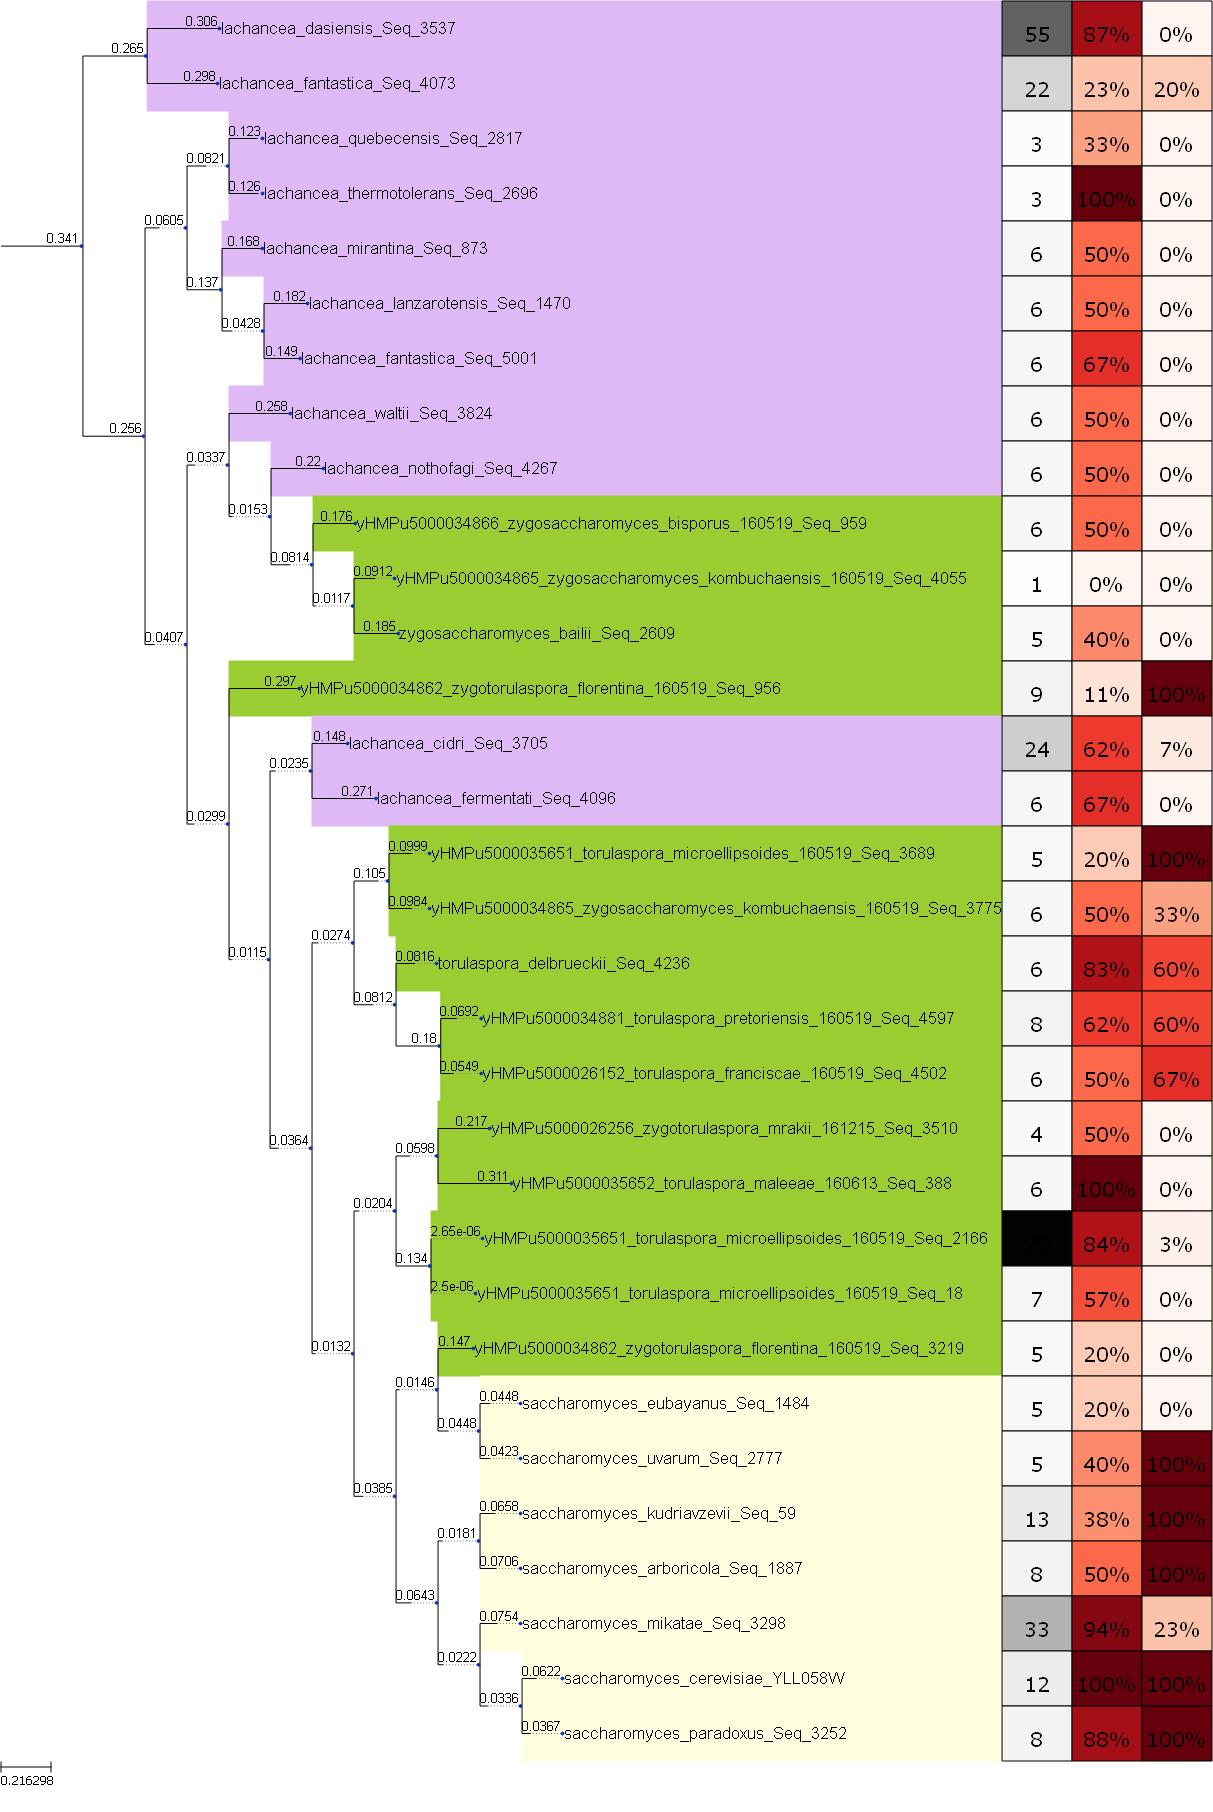

In [37]:
#def plot_tree_proms_exp_data(goi_pair, prom_phyls, t, y1000_species_subset, proms, motif_names, branch_labels, goi_exp_data, exp_subset_goi):

#makes tree ready to render for a goi pair and given promoters. 
#Includes visualization of gene expression data
#
#branch_labels can be 
# 'all':  puts branch length on top, bootstrap/alrt on the bottom or 
# 'bootstrap': Just puts bootstrap on top

#Color Node by species: 
sacc_colors = {'KLE': "#deb9f6", #e4cee4",#"#C6AFE9", 
               'ZT': "YellowGreen",
               'Post_WGH': "LightYellow" #White" # "LightYellow"
              }

# post_WGH_colors = {'low':  '#8cc3f6', # '#d3d3fe', #'#3192ff',#'#7eeaf7', ##2DD7ED',      #'#e6fcff', 
#                    'high': '#fcbba1'} #'#59E3EB'}  #'#ffebe6'}


#fname_tree = os.path.normpath(y1000plus_dir + 'proteins_og/' + goi_pair + '_' + og + '/tree/run' + N_tree_dict[goi_pair][0] + '/' + goi_pair + '_' + og + '_aln_' + N_tree_dict[goi_pair][1] + 'trimmed.fasta.treefile')
goi = 'STR2_YLL058W'
bprange = 15000

fname_tree = y1000plus_dir + os.path.normpath("y1000plus_tools_data/y1000plus/proteins_og/" + goi + '/'+ goi + '_aln_trimmed.fasta.treefile')
t = Tree(fname_tree, format=1) 
hsu1_mrca = t.get_common_ancestor(['saccharomyces_cerevisiae_YLL058W','lachancea_fantastica_Seq_4073'])
hsu1_mrca.ladderize()

ts = TreeStyle()
ts.show_leaf_name = True #False
ts.show_branch_length=True



# motif_colors = {'PDS': 'yellow', 'TATA': 'blue', 'STRE': 'red'}
# motif_lengths = {'PDS': 3*6, 'TATA': 3*8, 'STRE': 3*5 }  #They are triple the size

#box params:
width_box = 70
height_box = 55

cmap_counts = cm.get_cmap('Greys')
vmin = 0
vmax = 80
cmap_counts_norm = colors.Normalize(vmin=vmin, vmax=vmax)

cmap_pct = cm.get_cmap('Reds')
# vmin = 0
# vmax = 57
# cmap_counts_norm = colors.Normalize(vmin=vmin, vmax=vmax)


# cmap_TATA = cm.get_cmap("Blues")

# cmap_exp = cm.get_cmap('coolwarm')
# vmin = -7.5
# vmax = 7.5
# cmap_exp_norm = colors.Normalize(vmin=vmin, vmax=vmax)
# nan_color = '#808080'

# conds = list(goi_exp_data.columns)


# # To get rid of a set of species for the visualization
# # if less_nonsacc: 
# #     nonsacc_visualization_subset = pd.read_csv(y1000plus_dir + 'species_visualization_subset.csv')
# #     species_subset = ( set(nonsacc_visualization_subset['original_genome_id']) | \
# #                        set(y1000_species[y1000_species['Major clade']=='Saccharomycetaceae']['original_genome_id']) ) # | \
# #                        #set(y1000_species[y1000_species['Species name']==outgroup]['original_genome_id'])
# #                      #)
# #     y1000_species_subset = y1000_species[(y1000_species['original_genome_id'].isin(species_subset))]
# #     node_subset = []
# #     #For each node in the tree:
# #     for node in t.iter_leaves():  
# #         #Get the promoter sequence with motif info, make it into a motif list
# #         if 'saccharomyces_cerevisiae' in node.name:
# #             species='saccharomyces_cerevisiae'
# #         else: 
# #             species = '_'.join(node.name.split('_')[:-2])
# #         if species in species_subset: 
# #             node_subset.append(node.name)

# #     t.prune(node_subset)
# #     t.ladderize()

# # for node in t.iter_leaves():  
# #     print(node.name)

# #For each node in the tree:
for node in hsu1_mrca.traverse(): 
    #name_face = AttrFace("name",fsize=15)
    #node.add_face(name_face, column=0, position="branch-right")     
    if node.is_leaf():#Get the promoter sequence with motif info, make it into a motif list
        
        if 'saccharomyces_cerevisiae' in node.name:       
            species='saccharomyces_cerevisiae'
            gene_id = species + '@' + node.name.split(species +'_')[1]
        elif 'candida_albicans' in node.name: 
            species = 'candida_albicans'
            gene_id = species + '@' + node.name.split(species +'_')[1]
        else: 
            species = '_'.join(node.name.split('_')[:-2])
            gene_id = species + '@' + '_'.join(node.name.split('_')[-2:])

        
        if ('zygosaccharomyces' in node.name) | ('zygotorulaspora' in node.name) | ('torulaspora' in node.name):
            spec_group = 'ZT'
        elif 'lachancea' in node.name : 
            spec_group = 'KLE'
        elif 'saccharomyces' in node.name: 
            spec_group = 'Post_WGH'
        else :
            raise ValueError('No spec_group determined for {}'.format(species))


        
        nstyle = NodeStyle()
        node_color = sacc_colors[spec_group]
        nstyle['bgcolor'] = node_color
        node.set_style(nstyle)

        if species=='saccharomyces_cerevisiae':
            N_total_genes = 13
            N_sc_orths = 13
            N_cluster_orths = 13
        else: 
            gene_synteny_node = gene_synteny[node.name]
            
            sc_genes_dict = gene_synteny_node['sc_genes_dict']
            N_total_genes = gene_synteny_node['N_total_genes']
            N_sc_orths = gene_synteny_node['N_sc_orths']
            N_cluster_orths = gene_synteny_node['N_cluster_orths']
        
        #Add face for Number of genes within the bp range
        rgb = colors.to_hex(cmap_counts(cmap_counts_norm(N_total_genes-1)))

        rectFace_tot = RectFace(width=width_box, height=height_box, fgcolor='black', bgcolor=rgb, 
                            label= {"text": str(N_total_genes-1), 
                                    "color": 'black', 
                                    "fontsize": 16, 
                                    "font": 'Verdana'
                                   }
                           )
        node.add_face(rectFace_tot, column = 1, position= "aligned")
        
        
        #Add face for pct of genes that have Sc orthologs
        
        pct_sc = (N_sc_orths-1)/(N_total_genes-1)
        
        rgb = colors.to_hex(cmap_pct(pct_sc))
        
        rectFace_pct_sc = RectFace(width=width_box, height=height_box, fgcolor='black', bgcolor=rgb, 
                            label= {"text": '{:0.0f}%'.format(pct_sc*100), 
                                    "color": 'black', 
                                    "fontsize": 16, 
                                    "font": 'Verdana'
                                   }
                           )
        node.add_face(rectFace_pct_sc, column = 2, position= "aligned")
        
        
        #Add face for pct of sc orthologs that are in the cluster       
        
        if N_sc_orths == 1: 
            pct_cluster = 0
        else: 
            pct_cluster = (N_cluster_orths-1)/(N_sc_orths-1)
        
        rgb = colors.to_hex(cmap_pct(pct_cluster))
        
        rectFace_pct_cluster = RectFace(width=width_box, height=height_box, fgcolor='black', bgcolor=rgb, 
                            label= {"text": '{:0.0f}%'.format(pct_cluster*100), 
                                    "color": 'black', 
                                    "fontsize": 16, 
                                    "font": 'Verdana'
                                   }
                           )
        node.add_face(rectFace_pct_cluster, column = 3, position= "aligned")
        
        
        #Add seq face to illustrate the position of the gene and surrounding genes
        
        (low,start,end,high) = gene_synteny_node['scaffold_coords']
        print('{} : {}, {}, {}, {}'.format(node.name, low,start,end,high))
        #start = 7309
        #end = 9021
        
        #low = 0
        #high = 16521

        short_amt_high = int(end+bprange/2 - high)
        short_amt_low = -min(int(start-bprange/2), 0)

        seq = '-'*short_amt_low + 'A'*int(bprange/2-short_amt_low) + 'C'*(end-start) + 'G'*int(high-end) + '-'*short_amt_high
                    
        seqFace = SeqMotifFace(seq, gapcolor="red")
        node.add_face(seqFace, column=4, position = "aligned")
        
        


hsu1_mrca.render('%%inline', tree_style=ts)
#hsu1_mrca.render(metproj_data_dir + 'hsu1_synteny_summary.svg', tree_style=ts)





#         if 'saccharomyces_cerevisiae' in node.name:       
#             species='saccharomyces_cerevisiae'
#             gene_id = species + '@' + node.name.split(species +'_')[1]
#         elif 'candida_albicans' in node.name: 
#             species = 'candida_albicans'
#             gene_id = species + '@' + node.name.split(species +'_')[1]
#         else: 
#             species = '_'.join(node.name.split('_')[:-2])
#             gene_id = species + '@' + '_'.join(node.name.split('_')[-2:])


    #Color node based on species group

#         spec_group = exp_subset_goi[node.name][1]

#         if spec_group in {'high', 'low'}:
#             node_color = post_WGH_colors[spec_group]
#         else:
#             node_color = sacc_colors[spec_group]


#         prom_results = proms.loc[gene_id]

#     #     simple_motifs = [
#     #             # seq.start, seq.end, shape, width, height, fgcolor, bgcolor
#     #             [10, 60, ">", None, 10, "black", "red", None],
#     #             [120, 150, "<", None, 10, "black", "red", None]
#     #     ]
#         motifs = []

#         for motif_name in motif_names: #, 'PDS']:   #Leaving out PDS
#             motif_len = motif_lengths[motif_name]
#             motif_color = motif_colors[motif_name]
#             if prom_results[motif_name + '_count'] >0:

#                 for motif in prom_results[motif_name + '_full_features']:
#                     loc = motif[0]
#                     if loc <= L_prom:
#                         direction = motif[1]
#                         shape = '>'
#                         start = L_prom-loc
#                         stop = L_prom-loc + motif_len
#                         if direction == 'rev':
#                             shape = '<'
#                             start = L_prom-loc-motif_len
#                             stop = L_prom -loc
#                         motifs.append([start,stop,shape,None, height, "black", motif_color, None])

#         seqFace = SeqMotifFace(seq, motifs=motifs, seq_format="-")
#         node.add_face(seqFace, column=0, position="aligned")


          #Add face 

#         motif_name = 'STRE'
#         L_STRE_count = 700

#         N_STRE = 0
#         for result in prom_results['STRE_full_features']:
#             if result[0]<L_STRE_count:
#                 N_STRE = N_STRE+1

#         rgb = colors.to_hex(cmap_STRE(cmap_STRE_norm(N_STRE)))

#         rectFace_STRE = RectFace(width=width_box, height=height_box, fgcolor='black', bgcolor=rgb, 
#                             label= {"text": str(N_STRE), 
#                                     "color": 'black', 
#                                     "fontsize": 20, 
#                                     "font": 'Verdana'
#                                    }
#                            )
#         node.add_face(rectFace_STRE, column = 1, position= "aligned")

#         #Add face for TATA box within 700bp
#         motif_name = 'TATA'
#         L_TATA = 300

#         TATA = 0.0
#         for result in prom_results['TATA_full_features']:
#             if result[0]<L_TATA:
#                 TATA = 1.0

#         rgb = colors.to_hex(cmap_TATA(TATA))

#         rectFace_TATA = RectFace(width=width_box, height=height_box, fgcolor='black', bgcolor=rgb)

#         node.add_face(rectFace_TATA, column=2, position="aligned")


#         #add faces for expression data

#         for jj, cond in enumerate(conds):
#             data_val = goi_exp_data.loc[exp_subset_goi[node.name][0],cond]

#             if np.isnan(data_val): 
#                 rgb = nan_color
#             else: 
#                 rgb = colors.to_hex(cmap_exp(cmap_exp_norm(data_val)))

#             rectFace_exp_cond = RectFace(width=width_box, height=height_box, fgcolor='black', bgcolor=rgb)
#             node.add_face(rectFace_exp_cond, column = 3+jj, position= "aligned")


#     else:  # If node is not a leaf, add the support label
#         if branch_labels=='all': 
#             node_label = TextFace(node.name)
#             node.add_face(node_label, column=1, position = "branch-bottom")
#         elif branch_labels =='bootstrap':
#             node_label = TextFace(node.name.split('/')[0])
#             node.add_face(node_label, column=1, position = "branch-top")
#         else: 
#             raise ValueError('invalid value for branch_labels: {}'.format(branch_labels))


# return t, ts

In [31]:
node.name

'lachancea_dasiensis_Seq_3537'

In [44]:
#For a set of coords, make a sequence

start = 7309
end = 9021
bprange = 15000
low = 0
high = 16521

short_amt_high = end+int(bprange/2) - high
short_amt_low = -min(int(start-bprange/2), 0)

seq = '-'*short_amt_low + 'A'*int(bprange/2-short_amt_low) + 'C'*(end-start) + 'G'*(high-end) + '-'*short_amt_high

In [59]:
(bprange-short_amt_high+end-start)

16712

In [38]:
import matplotlib.patches as patches

In [47]:
ax.add_patch?

Signature: ax.add_patch(p)
Docstring: Add a `~.Patch` to the axes' patches; return the patch.
File:      c:\users\heineib\anaconda3\envs\sc_seq_py\lib\site-packages\matplotlib\axes\_base.py
Type:      method


In [ ]:
for node in hsu1_mrca.traverse(): 

0: lachancea_dasiensis_Seq_3537
1: lachancea_fantastica_Seq_4073
2: yHMPu5000034862_zygotorulaspora_florentina_160519_Seq_956
3: lachancea_waltii_Seq_3824
4: lachancea_quebecensis_Seq_2817
5: lachancea_thermotolerans_Seq_2696
6: lachancea_mirantina_Seq_873
7: lachancea_nothofagi_Seq_4267
8: lachancea_lanzarotensis_Seq_1470
9: lachancea_fantastica_Seq_5001
10: lachancea_cidri_Seq_3705
11: lachancea_fermentati_Seq_4096
12: yHMPu5000034866_zygosaccharomyces_bisporus_160519_Seq_959
13: yHMPu5000034865_zygosaccharomyces_kombuchaensis_160519_Seq_4055
14: zygosaccharomyces_bailii_Seq_2609
15: yHMPu5000035651_torulaspora_microellipsoides_160519_Seq_3689
16: yHMPu5000034865_zygosaccharomyces_kombuchaensis_160519_Seq_3775
17: torulaspora_delbrueckii_Seq_4236
18: yHMPu5000034862_zygotorulaspora_florentina_160519_Seq_3219
19: yHMPu5000026256_zygotorulaspora_mrakii_161215_Seq_3510
20: yHMPu5000035652_torulaspora_maleeae_160613_Seq_388
21: yHMPu5000035651_torulaspora_microellipsoides_160519_Seq_2166

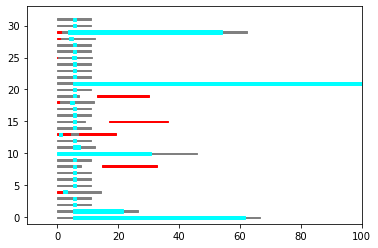

In [140]:
fig, ax = plt.subplots(1,1)
ax.set_xlim(-10,100)
ax.set_ylim(-1,33)

kk=0
for jj, node in enumerate(hsu1_mrca.traverse()): 
    
    if node.is_leaf():
        print("{}: {}".format(kk,node.name))
        gene_synteny_node = gene_synteny[node.name]
        (low,start,end,high) = gene_synteny_node['scaffold_coords']

        short_amt_high = end+int(bprange/2) - high
        short_amt_low = -min(int(start-bprange/2), 0)

        scaff_width = 0.25
        gene_width = 0.5
        x_scale = bprange/10


        ax = draw_scaffold(ax, kk, scaff_width, gene_width, x_scale, start, end, bprange, low, high, short_amt_high, short_amt_low)
        kk = kk+1
    

In [ ]:
#Kombuchaensis, quebequois:  gene is not in the middle
#lanzotolerensis, mrakii, microellipsoides 3689 - separation after scaffold
#dasiensis - microellipsoides 2166, cidri, fantastici - super long gene

In [63]:
def draw_scaffold(ax, spec_ind, scaff_width, gene_width, x_scale, start, end, bprange, low, high, short_amt_high, short_amt_low):
    # Create a Rectangle patch


    #before scaffold gap
    if short_amt_low>0: 
        bef_scaff = patches.Rectangle((0, spec_ind-scaff_width/2), short_amt_low/x_scale, scaff_width, linewidth=1, edgecolor='r', facecolor='red', zorder=0)
        ax.add_patch(bef_scaff)

    #relevant scaffold
    scaff = patches.Rectangle((0+short_amt_low/x_scale, spec_ind-scaff_width/2), (bprange-short_amt_high+end-start)/x_scale, scaff_width, linewidth=1, edgecolor='grey', facecolor='grey', zorder=0)
    ax.add_patch(scaff)

    #gene
    gene = patches.Rectangle(((start-low)/x_scale, spec_ind-gene_width/2), (end-start)/x_scale, gene_width, linewidth=1, edgecolor='cyan', facecolor='cyan', zorder=1)
    ax.add_patch(gene)


    #after scaffold gap.


    # Add the patch to the Axes
    if short_amt_high>0: 
        aft_scaff = patches.Rectangle(((bprange-short_amt_high+high-low)/x_scale, spec_ind-scaff_width/2), (bprange+high-low)/x_scale, scaff_width, linewidth=1, edgecolor='r', facecolor='red', zorder=0)
        ax.add_patch(aft_scaff)
        
    return ax

In [33]:
matplotlib.patches.Rectangle(xy, width, height, angle=0.0, **kwargs)

994193.0

In [26]:
short_amt_low
'-'*short_amt_low + 'A'*int(bprange/2-short_amt_low) + 'C'*(end-start) #+ 'G'*(high-end) + '-'*short_amt_high

'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

In [7]:
#Check extent of scaffolds.

#For the ZT Branch that has some conservation see what the other proteins (that don't group with orthologs) are similar to

#Figure out why Z. rouxii ortholog didn't show up

#Verify that the orthologs do map most closely to the YLL proteins. 

#Repeat the analysis for neighboring proteins.  

#Repeat the analysis for the other Sulfur operon. 




#Print out order on top of phylogenetic tree

#C:\Users\heineib\Documents\GitHub\y1000plus_tools\data\y1000plus_tools_data\y1000plus\gffutils_dbs

{'64_2337': ['YGL253W (HXK2)', 'YFR053C (HXK1)'],
 '64_2695': ['YJR130C (STR2)', 'YML082W (YML082W)', 'YLL058W (YLL058W)'],
 '64_4093': ['YFR052W (RPN12)'],
 '64_4177': ['YGL252C (RTG2)']}

In [95]:
#Find genes in S. cer related to surrounding genes

goi_og_lookup_surr, og_genes_lookup_surr = y1000plus_tools.make_og_genes_lookup(surrounding_CDS_df['y1000_id'], y1000_species_subset)

scer_prefix = '110'

sc_genes_dict = {}
for goi, og in goi_og_lookup_surr.items():
    og_genes = og_genes_lookup_surr[og]
    sc_genes = []
    for og_gene in list(og_genes): 
        if (og_gene.split('_')[0]==scer_prefix): 
            sc_genes.append(scer_y1000_id_gene_id_lookup[og_gene])
    sc_genes_dict[goi] = sc_genes 
    
sc_genes_dict

In [91]:
check_gene = '111_1158'
for sc_goi, og in goi_og_lookup.items():
    og_genes = og_genes_lookup[og]
    if check_gene in og_genes:
        print('{} is an ortholog of {}'.format(check_gene, sc_goi))

In [ ]:
def find_spec_synteny(synteny_window_new_cols, focus_spec, focus_anc, genome_name_lookup, y1000_species_subset, anc_genes_ogs_flat, og_genes_lookup, bp_range):
    #Given a species, find genes surrounding the ortholog of the goi pair.


    #Get focus species genes that are present in focus ogs
    spec_og_id_lookup = dict(zip( y1000_species_subset['original_genome_id'], y1000_species_subset['spec_og_id']))
    spec_og_id = spec_og_id_lookup[focus_spec]
    focus_ogs = anc_genes_ogs_flat[focus_anc]

    og_genes = set()
    for og in focus_ogs: 
        og_genes = og_genes | og_genes_lookup[og]

    focus_spec_genes = []
    for og_gene in list(og_genes): 
        spec_og_id_test = int(og_gene.split('_')[0])
        if spec_og_id == spec_og_id_test:
            focus_spec_genes.append(og_gene)

    #Make full_gene lookup for focus spec
    focus_spec_lookup_fname = y1000plus_dir + os.path.normpath('id_lookups/' + focus_spec + '.csv')
    focus_spec_lookup = pd.read_csv(focus_spec_lookup_fname, index_col=0)
    y1000_id_gene_full_lookup = dict(zip(focus_spec_lookup['y1000_id'],focus_spec_lookup['gene_full']))        
    gene_full_y1000_id_lookup = dict(zip(focus_spec_lookup['gene_full'],focus_spec_lookup['y1000_id']))    
    y1000_id_gene_id_lookup = dict(zip(focus_spec_lookup['y1000_id'],focus_spec_lookup.index))    

    # Load GTF for given sequence: 
    gtf_dir = y1000plus_dir + "0_332yeast_genomes/332_genome_annotations/gtf/"
    db_fname = gtf_dir + 'gffutils_dbs/' + focus_spec + '.db'

    gtf_db = gffutils.FeatureDB(db_fname)


    # Make a dictionary of scaffold sizes
    genome_assembly_fname = y1000plus_dir + os.path.normpath('0_332yeast_genomes/332_genome_assemblies/' + focus_spec + '.fas')

    scaffold_sizes = {}
    for seq in SeqIO.parse(genome_assembly_fname, "fasta"):
        scaffold_sizes[seq.id] = len(seq.seq)

    for og_gene in focus_spec_genes: 
        #print(og_gene)
        focus_gene_column = y1000_find_surrounding_genes(og_gene, y1000_id_gene_id_lookup, y1000_id_gene_full_lookup, gene_full_y1000_id_lookup, og_genes_lookup, gtf_db, bp_range, scaffold_sizes, anc_genes_ogs_flat, focus_spec_genes, focus_spec)
        synteny_window_new_cols = synteny_window_new_cols.merge(focus_gene_column, left_on='Ancestor', right_index = True, how='left')

    return synteny_window_new_cols


def y1000_find_surrounding_genes(og_gene, y1000_id_gene_id_lookup, y1000_id_gene_full_lookup, gene_full_y1000_id_lookup, og_genes_lookup, gtf_db, bp_range, scaffold_sizes, anc_genes_ogs_flat, focus_spec_genes, focus_spec):
    #for a given gene find the surrounding genes 
    
    focus_gene_id = y1000_id_gene_id_lookup[og_gene]

    gene_full = y1000_id_gene_full_lookup[og_gene]

    cursor = gtf_db.execute('select * from features where attributes like "%' + gene_full + '%"')
    all_features = cursor.fetchall()
    if len(all_features) == 0:
        print('No features found ' + gene_full + ' ' + focus_spec)  

    CDS_list = [feature for feature in all_features if feature['featuretype']=='CDS']
    if len(CDS_list)==1: 
        start = CDS_list[0]['start']
        end = CDS_list[0]['end']
    elif len(CDS_list)>1: 
        print('More than one CDS - introns?.  N of CDS: '+ str(len(CDS_list)))
        start = min([CDS['start'] for CDS in CDS_list])
        end = max([CDS['end'] for CDS in CDS_list])
    else: 
        raise AssertionError('No CDS found' + og_gene)

    CDS = CDS_list[0]
    strand = CDS['strand']
    scaffold = CDS['seqid']

    # if strand=='+': 
    #     lower = start
    #     higher = end
    # elif strand == '-': 
    #     lower = end
    #     higher = start

    low = max(0,start-bp_range/2)
    high = min(scaffold_sizes[scaffold], end + bp_range/2)

    surrounding_CDS = list(gtf_db.region(region=(scaffold,low,high), completely_within=False, featuretype='CDS'))

    #surrounding_CDS info: (gene_full, gene_id, strand, start, end)
    surrounding_CDS_data = []
    for CDS_surr in surrounding_CDS:
        surrounding_CDS_data.append((CDS_surr.attributes['gene_id'][0],CDS_surr.id,CDS_surr.strand,CDS_surr.start,CDS_surr.end ))

    #Find OG and line that each gene is in
    anc_focus_spec_genes = OrderedDict([(anc,[]) for anc in anc_genes_ogs_flat.keys()])
    for (gene_full, gene_id, strand, start, end) in surrounding_CDS_data:
        y1000_id = gene_full_y1000_id_lookup[gene_full]
        for anc,og_list in anc_genes_ogs_flat.items():
            for og in og_list: 
                og_genes = og_genes_lookup[og]
                if y1000_id in og_genes:  #could put in a test to make sure this only happens once
                    anc_focus_spec_genes[anc].append(y1000_id_gene_id_lookup[y1000_id])
                    #could make triple dashes if len(anc_focus_spec_genes[anc]) == 0:
            #remove redundancies created by genes with introns
            anc_focus_spec_genes[anc]=list(set(anc_focus_spec_genes[anc]))
    #Merge into synteny window dataframe

    focus_gene_column = pd.DataFrame(pd.Series(anc_focus_spec_genes), columns = [focus_spec + '_' + focus_gene_id])



    return focus_gene_column